# Census Income
# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


Dataset Link-

https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')


In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [9]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [10]:
df.shape

(32560, 15)


Observation:

Rows: 32560
Columns: 15
    
# EDA

***check Data types



In [11]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [12]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64


Observation:

Categorical variables: "Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country, Income"

Numerical variables: "Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week"



***Dropping the variable "Education" as there is already a variable "Education_num" which maps the various "Education" levels.



In [13]:
df.groupby('Education')['Education_num'].sum()

Education
 10th             5598
 11th             8225
 12th             3464
 1st-4th           336
 5th-6th           999
 7th-8th          2584
 9th              2570
 Assoc-acdm      12804
 Assoc-voc       15202
 Bachelors       69602
 Doctorate        6608
 HS-grad         94509
 Masters         24122
 Preschool          51
 Prof-school      8640
 Some-college    72910
Name: Education_num, dtype: int64

In [14]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [15]:
df1=df.drop(columns='Education',inplace=False)
df1

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


***Check for missing values:

In [16]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64


Observation:

There are no missing values in any of the variables



Check variables distribution for skewness, imbalance, multicoliinearity etc.

***Data Distribution:

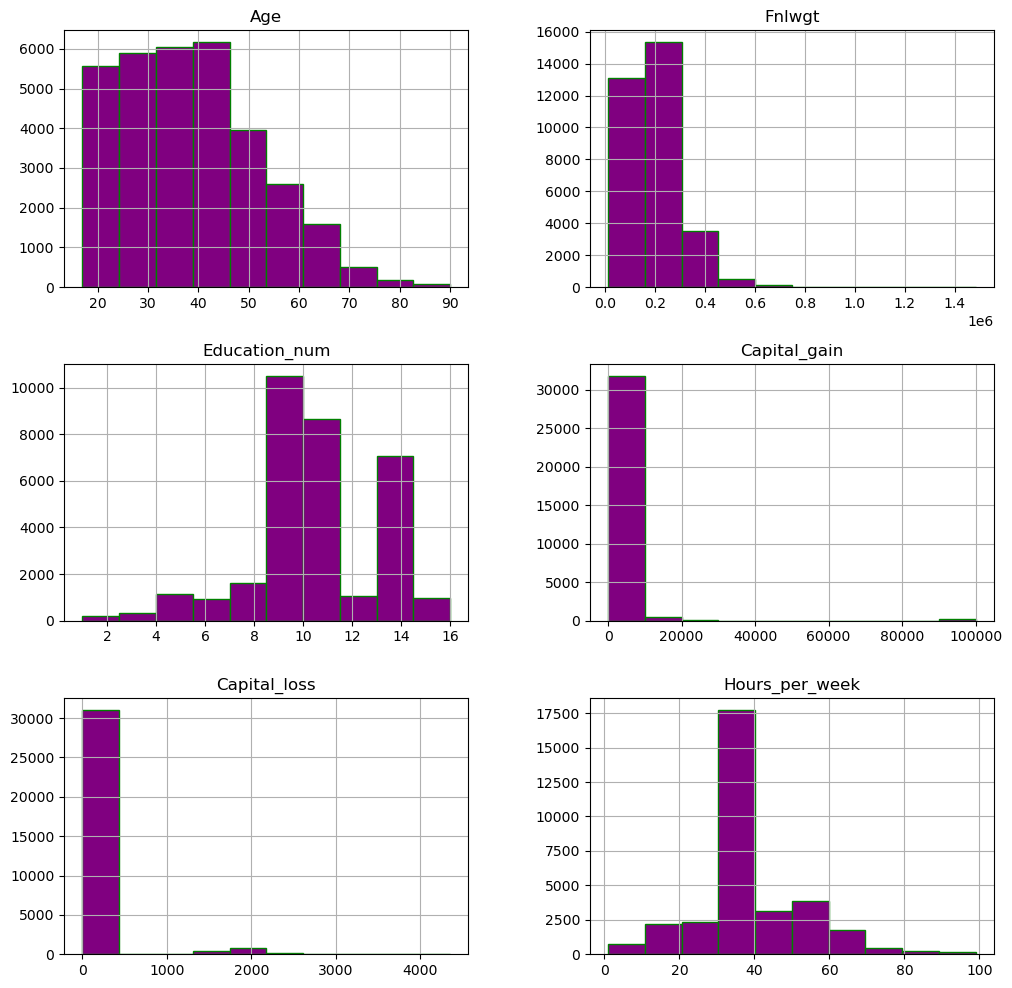

In [11]:
Numerical=['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
df1[Numerical].hist(figsize=(12,12),ec='green',color='purple')
plt.show()

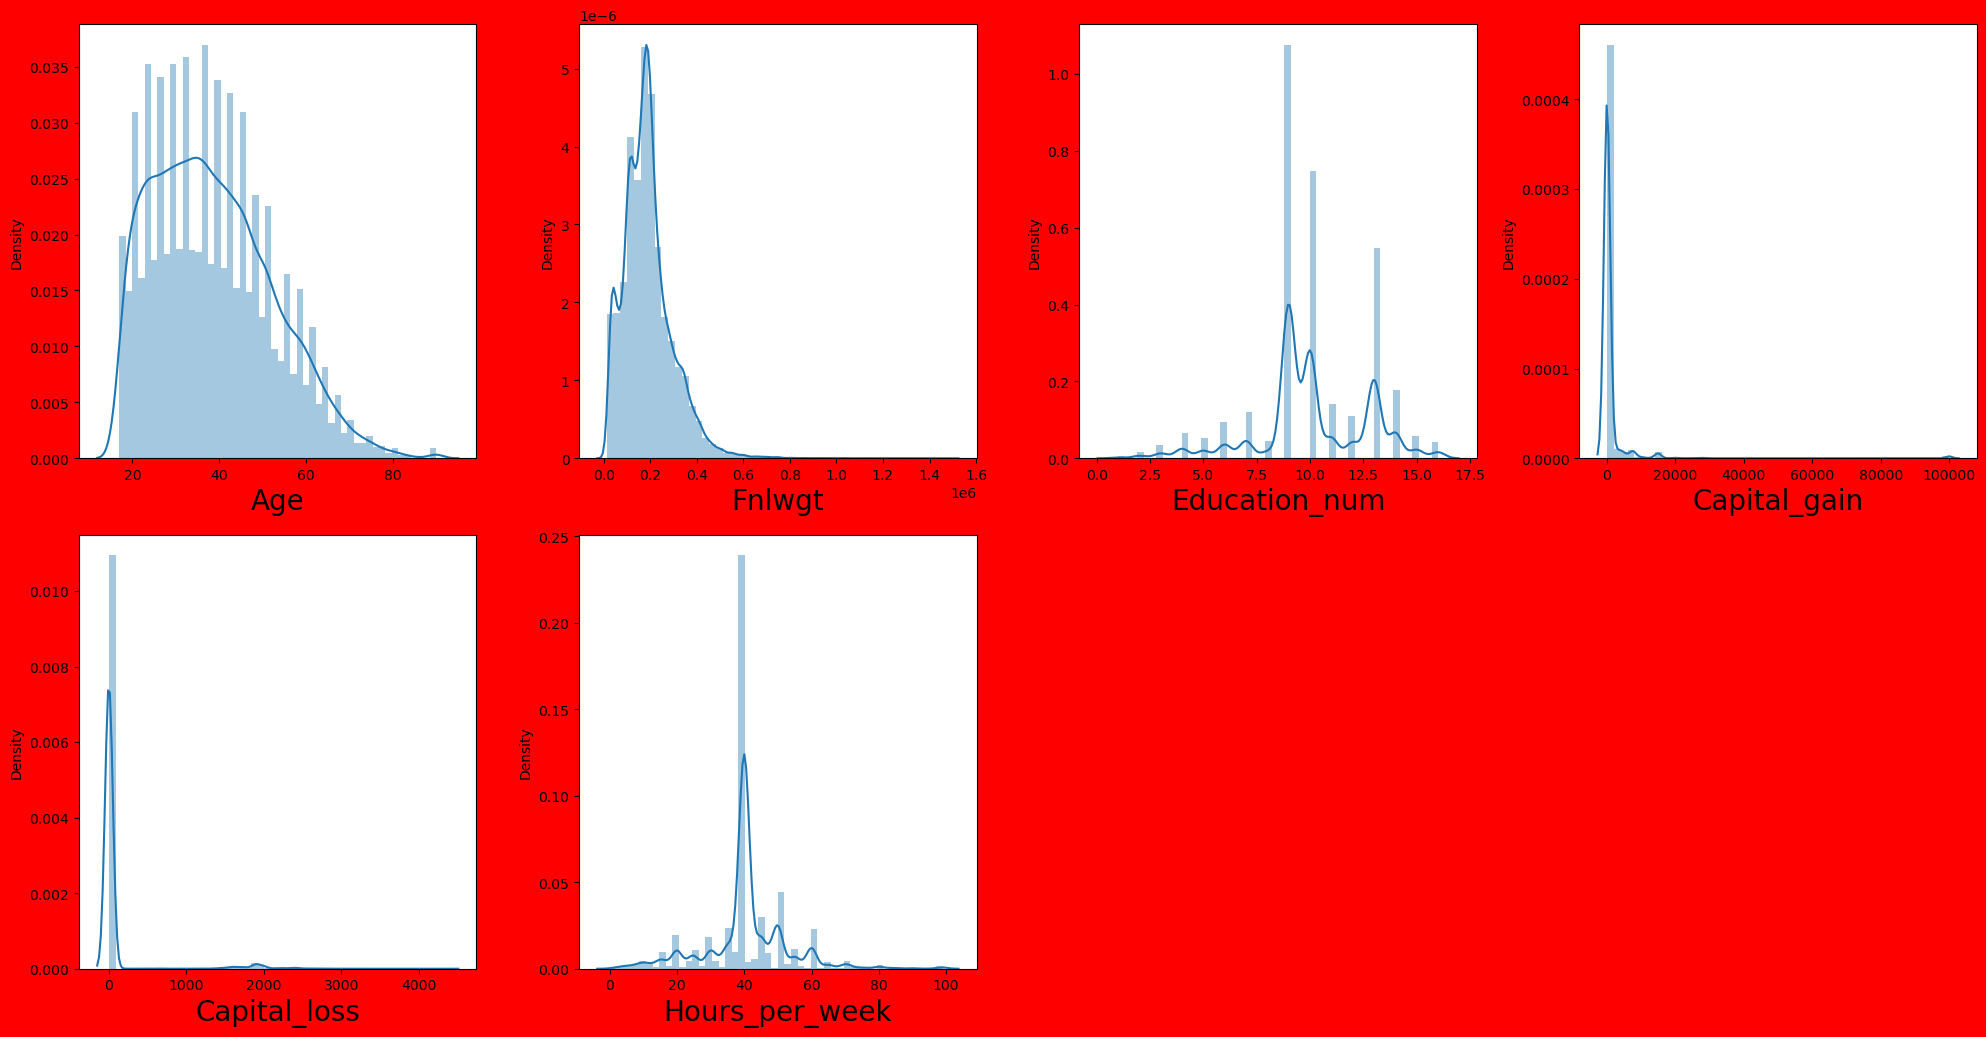

In [26]:
plt.figure(figsize = (20,15),facecolor = 'red')

plotnumber = 1

for column in df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']]:
    if plotnumber <= 6:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(df[['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']][column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

In [12]:
df1[Numerical].skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64


Observation:

Fnlwgt, Capital_gain and Capital_loss are very highly skewed.



To check for outliers using boxplot



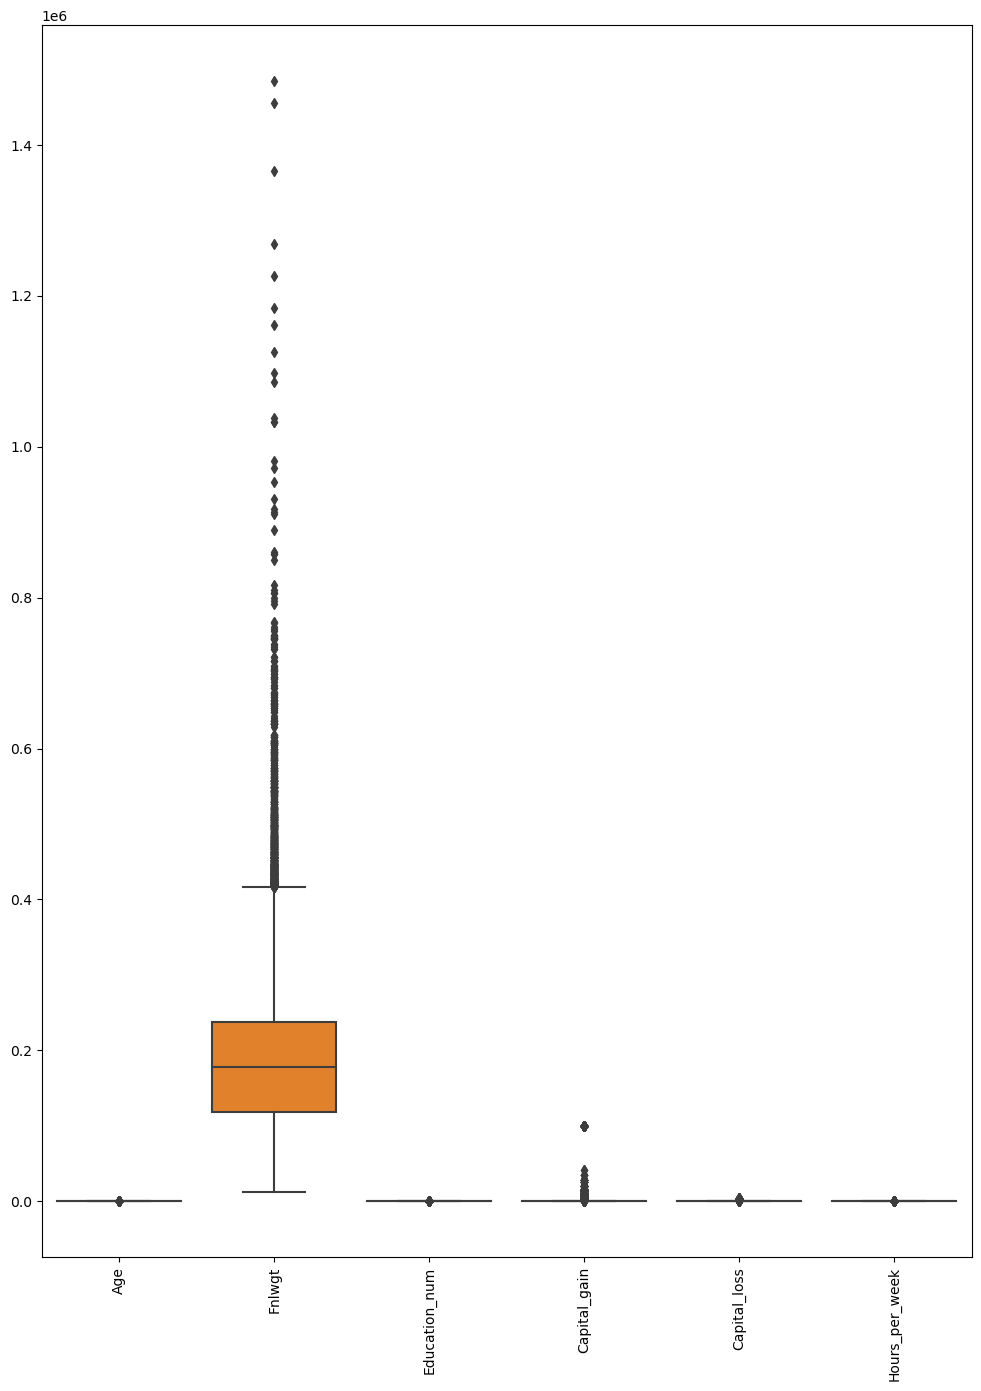

In [13]:
plt.figure(figsize=(12,16))
# for i in Numerical:
sns.boxplot(data=df1[Numerical])
plt.xticks(rotation=90)
plt.show()


Observation:

"Fnlwgt" appears to have signnificant outliers



To check distribution of categorical variables



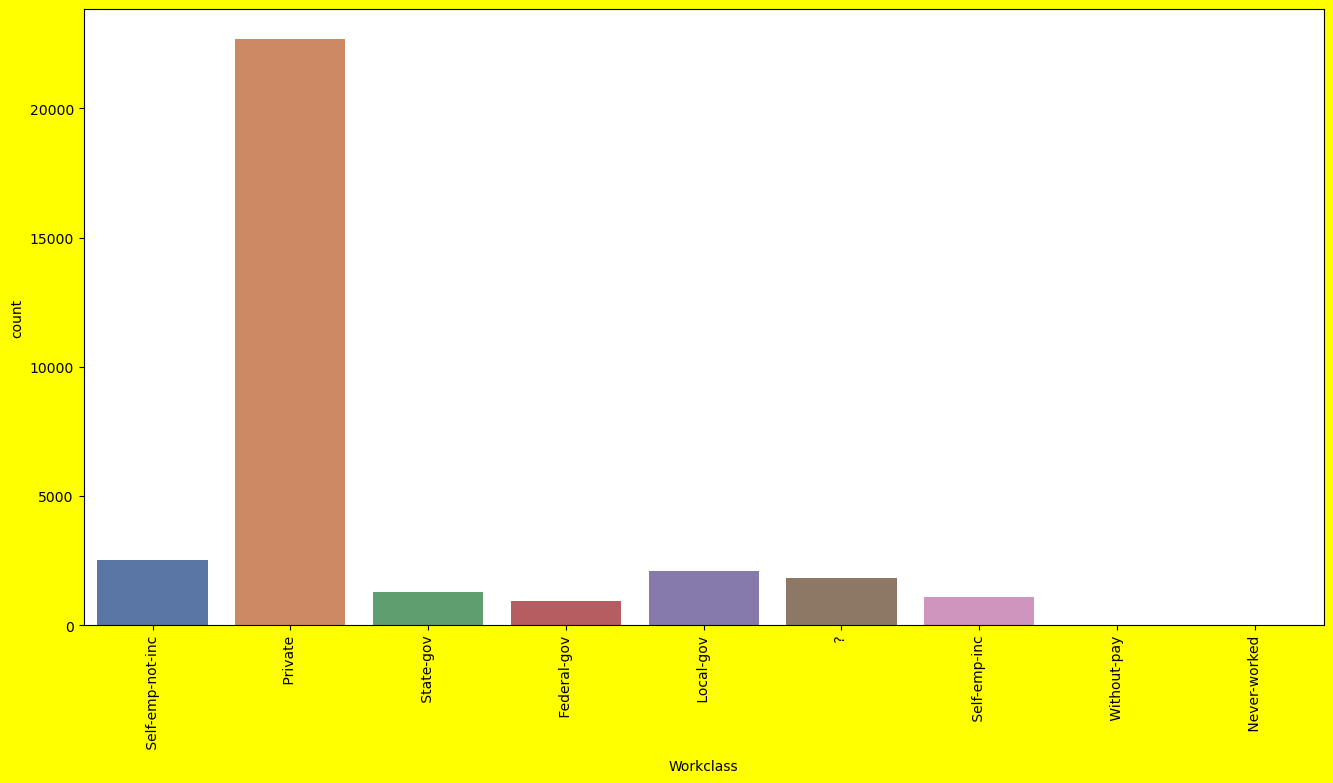

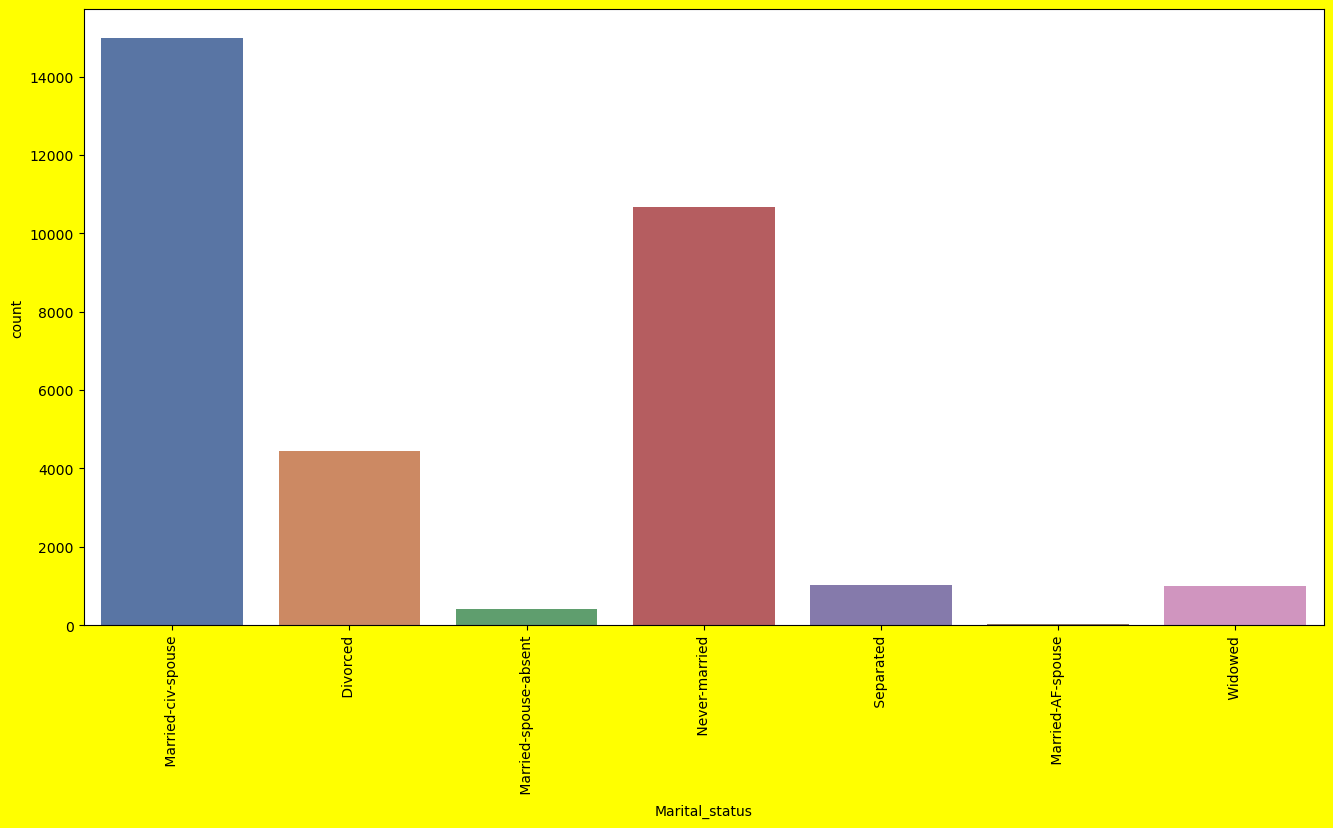

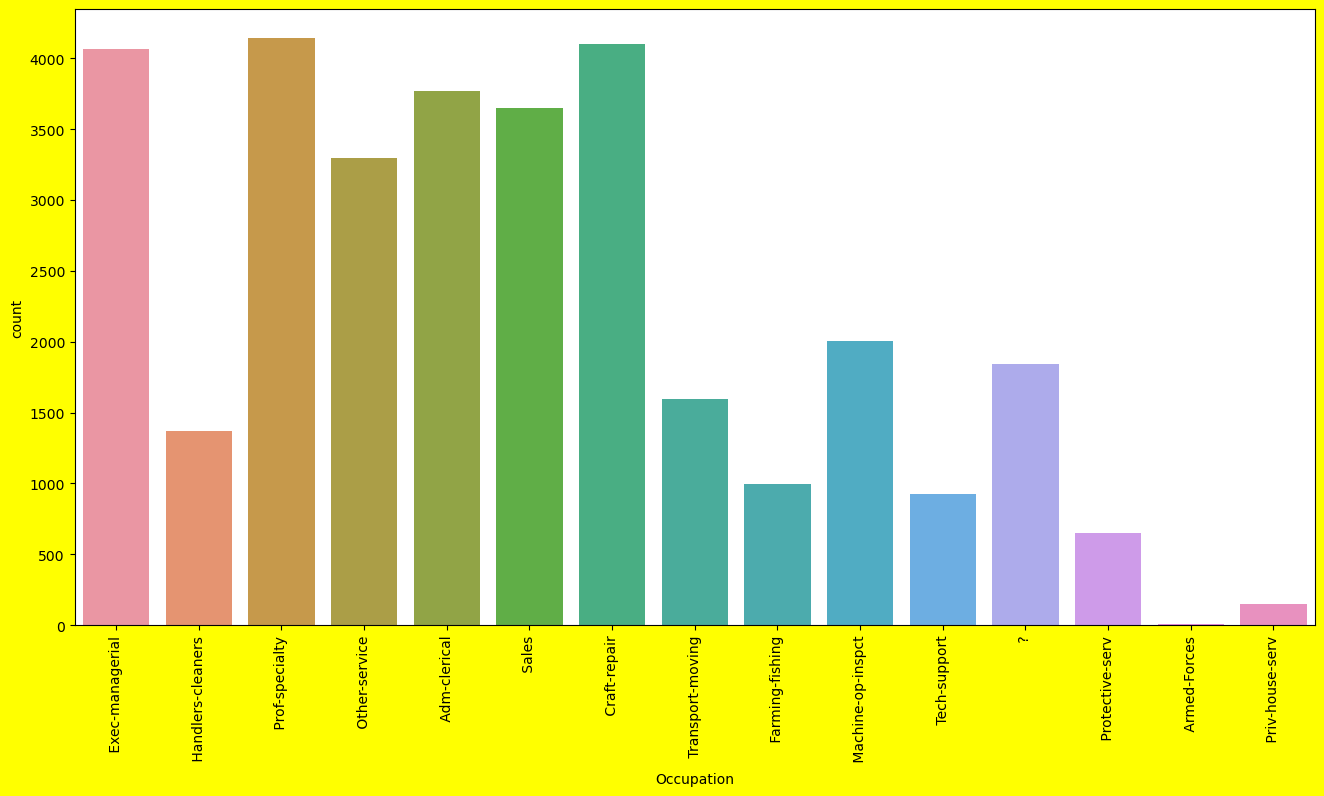

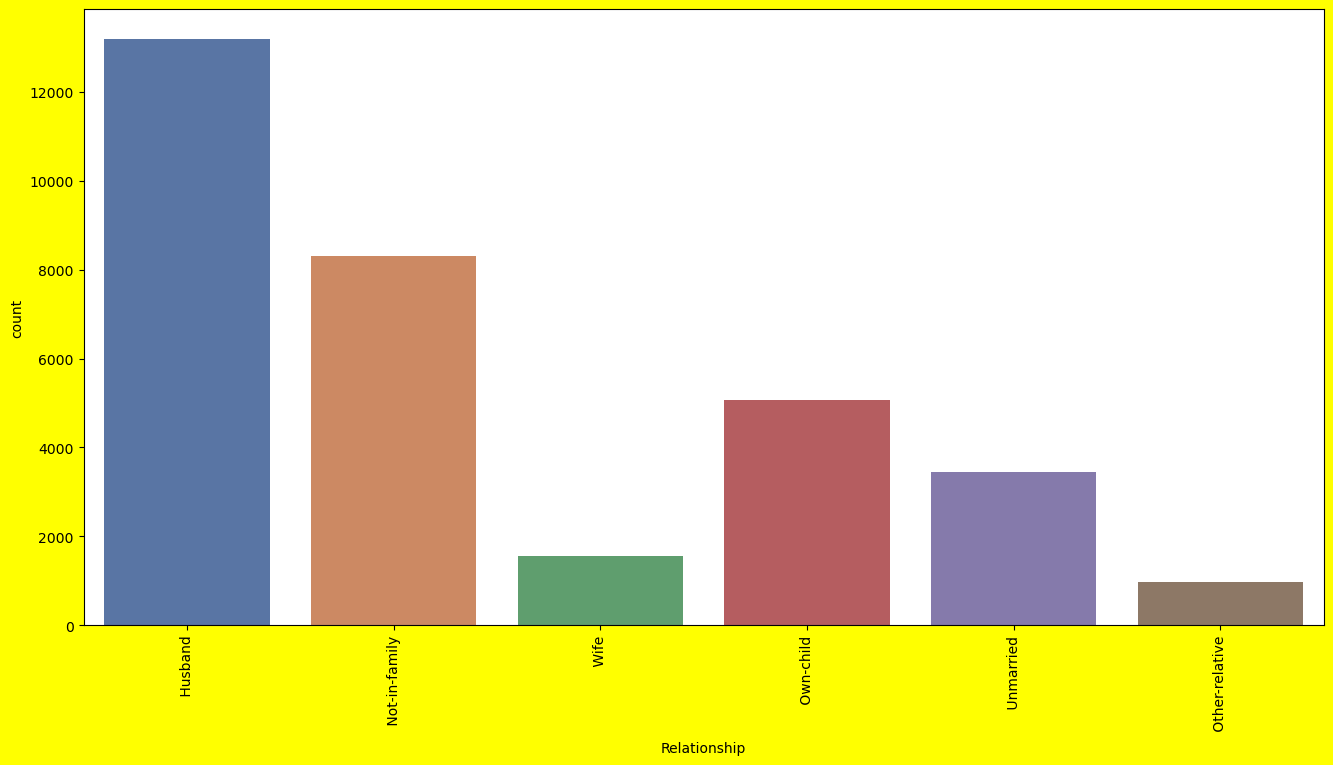

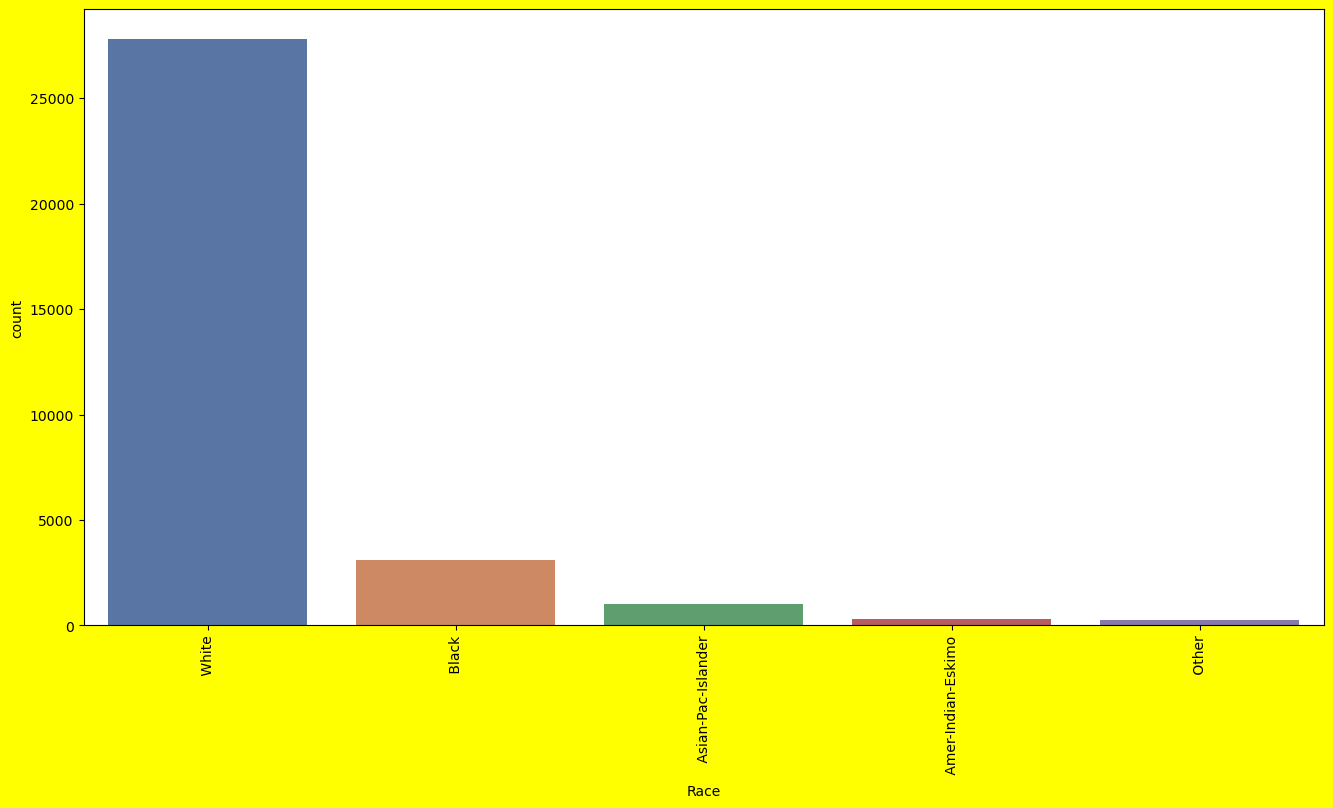

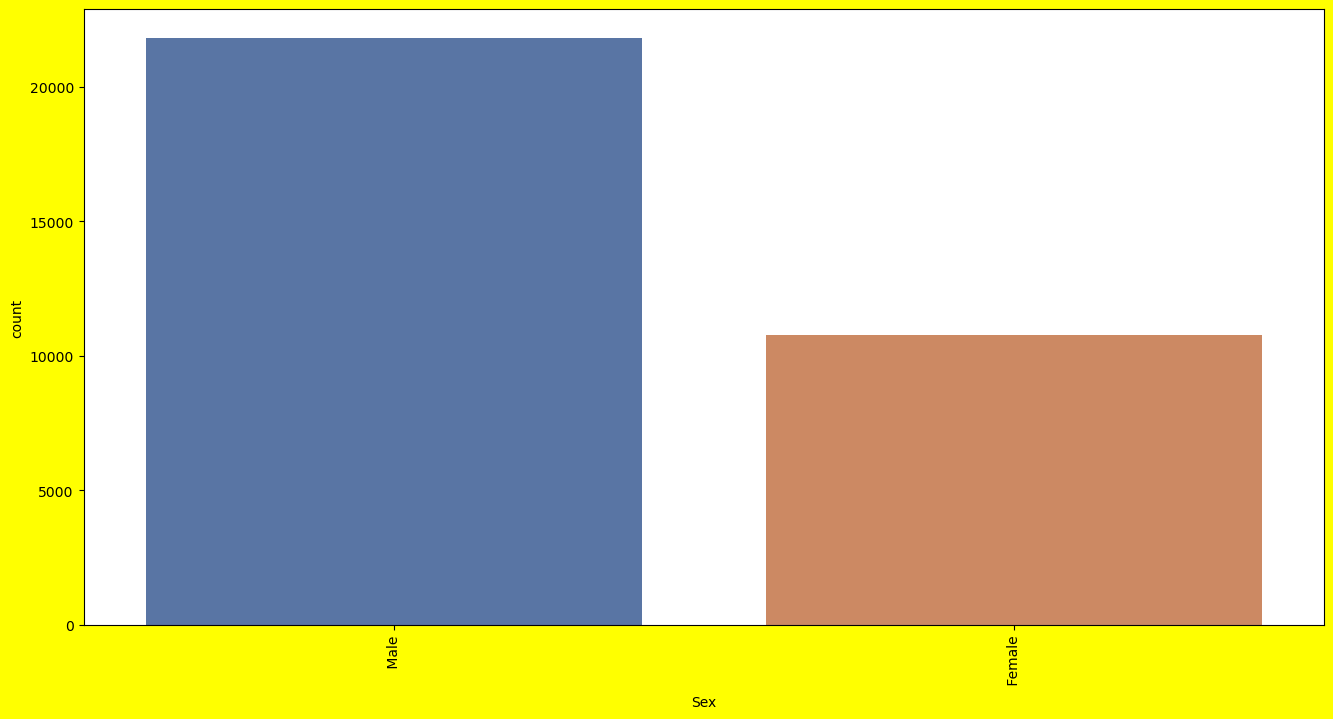

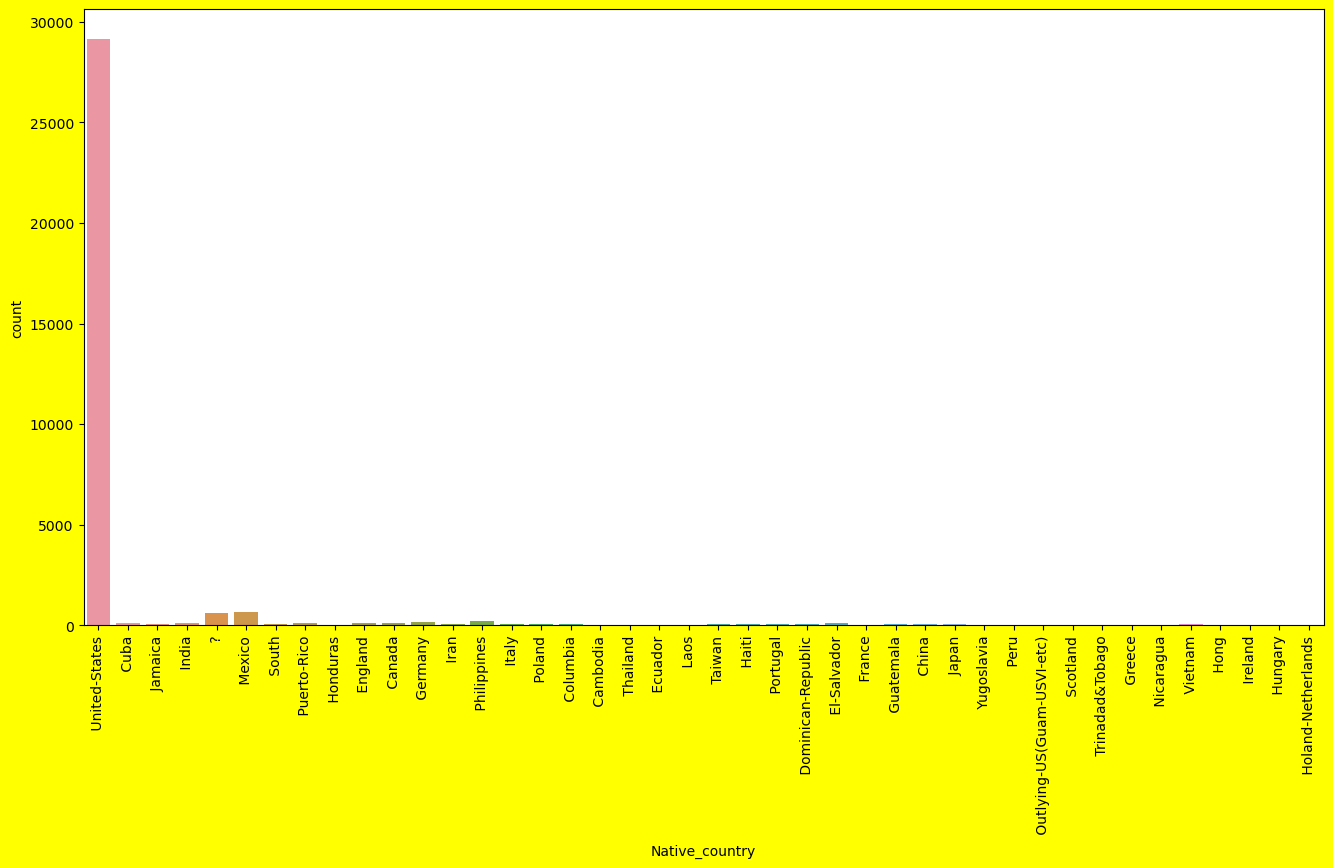

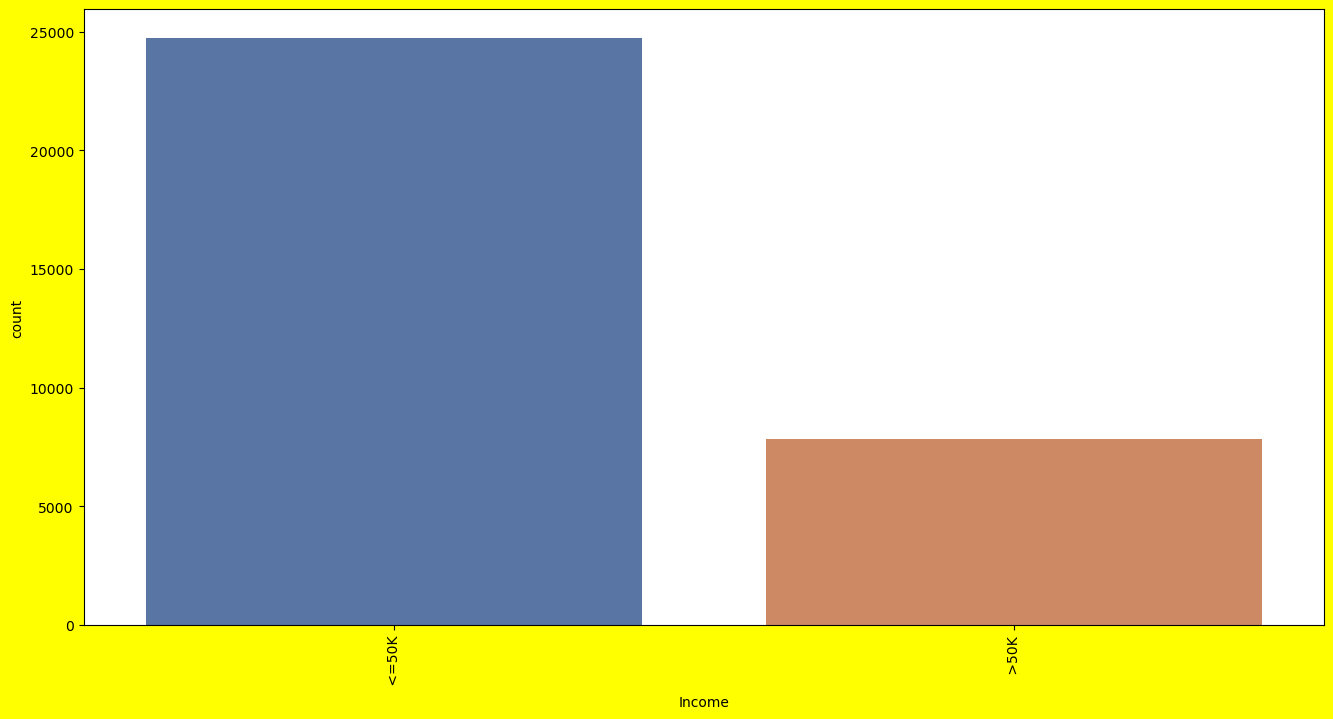

In [28]:
sns.set_palette('deep')
for i in df1[["Workclass", "Marital_status","Occupation", "Relationship", "Race", "Sex", "Native_country", "Income"]]:
    plt.figure(figsize=(16,8),facecolor='yellow')
    sns.countplot(x=i, data=df1)
    plt.xticks(rotation=90)
    plt.show()

Observations:

There are same values with " ? " present in variables "Occupation", "Workclass" and "Native_country".

Income class is highly imbalanced with <=50K is the majority class whereas >50K is the minority class.


" ? " has to be replaced by "Others".

The class imbalance has to be overcome by using SMOTE operation.



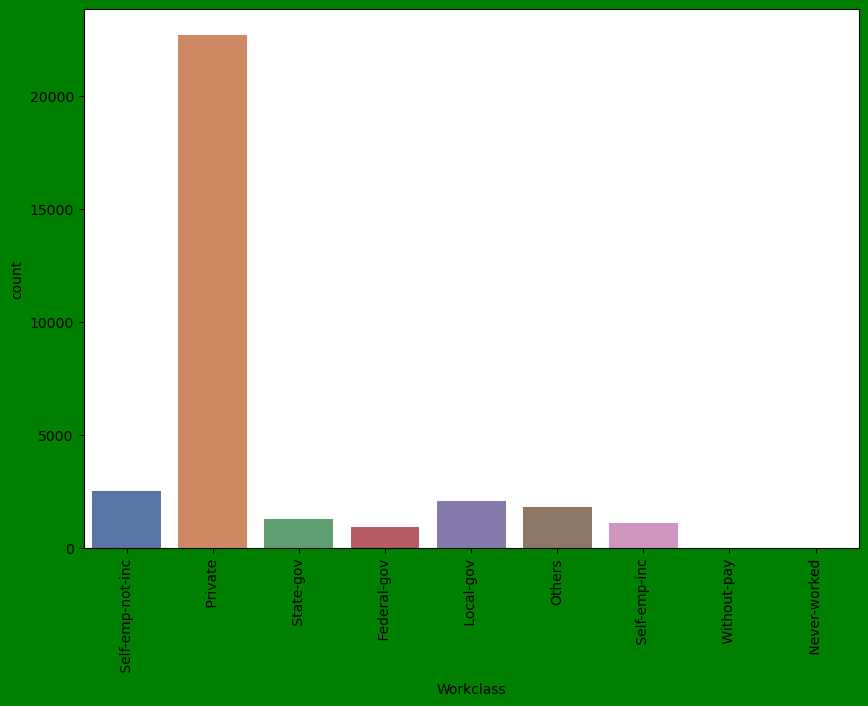

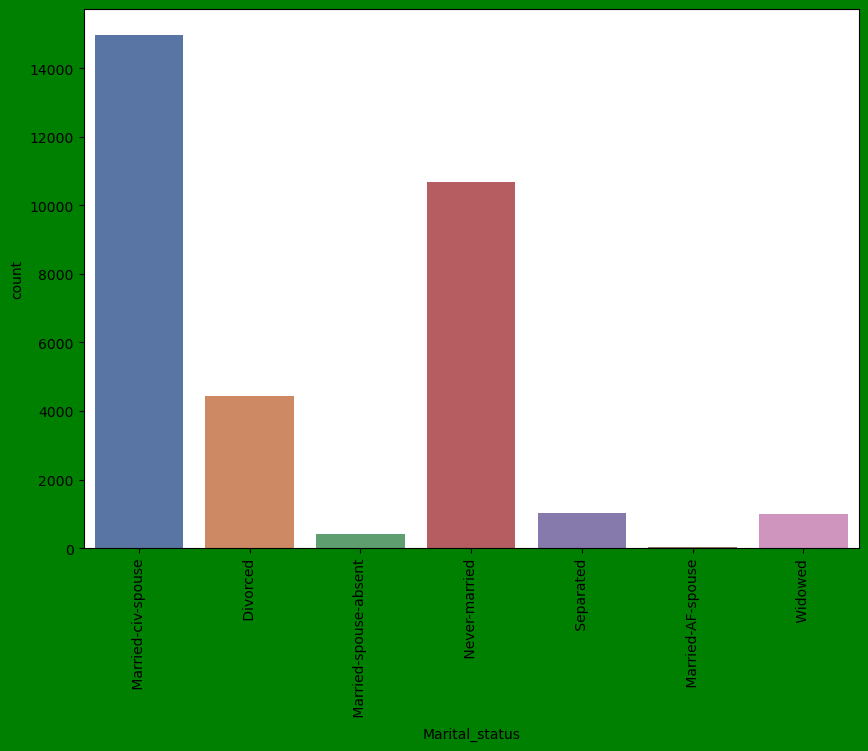

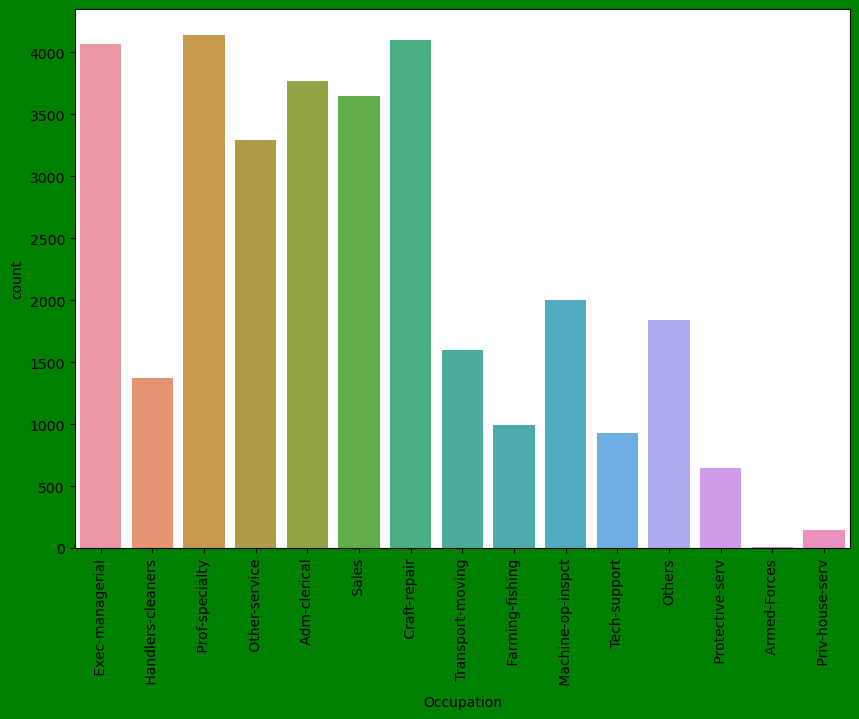

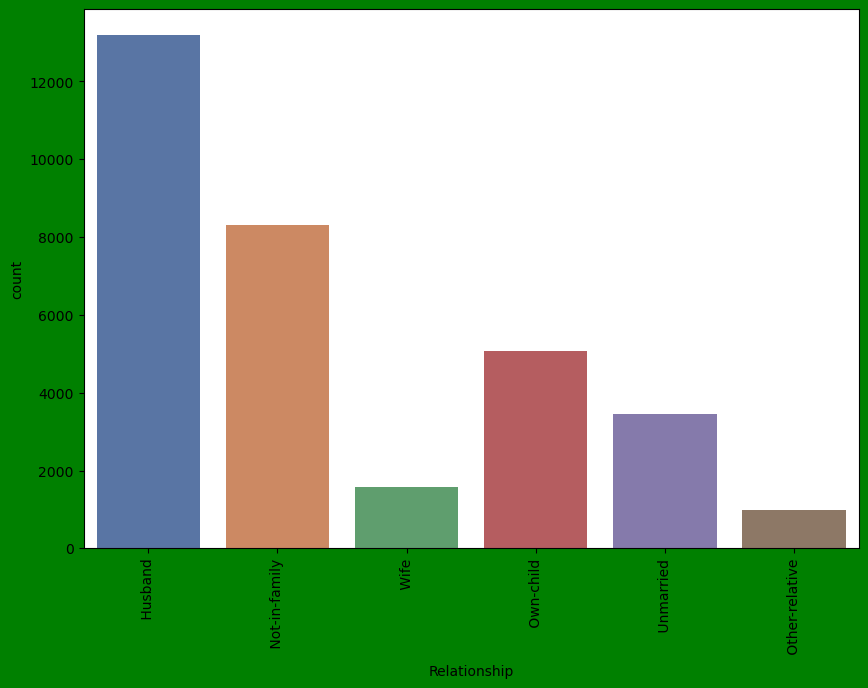

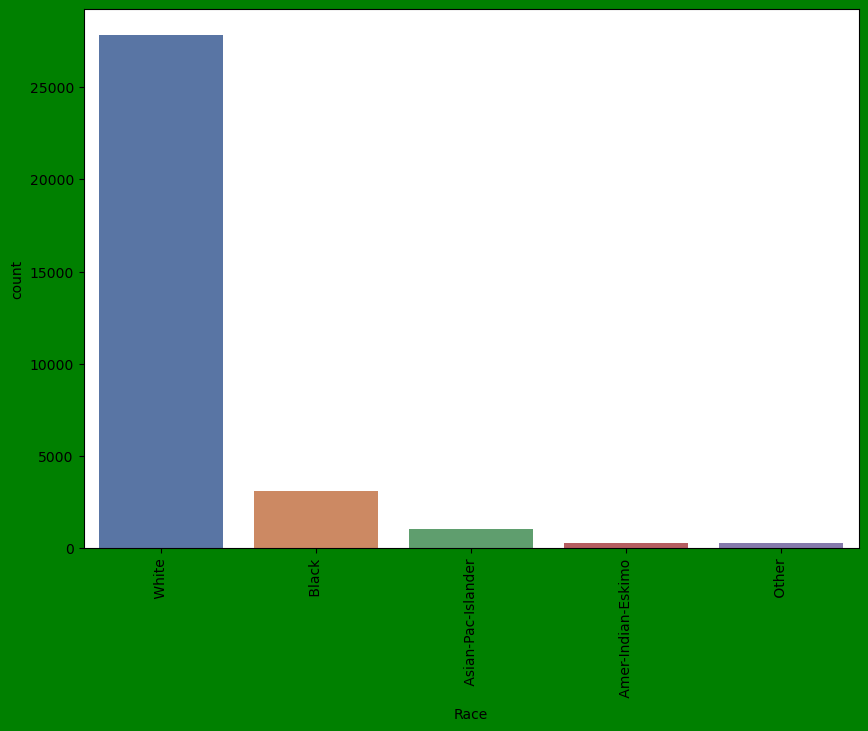

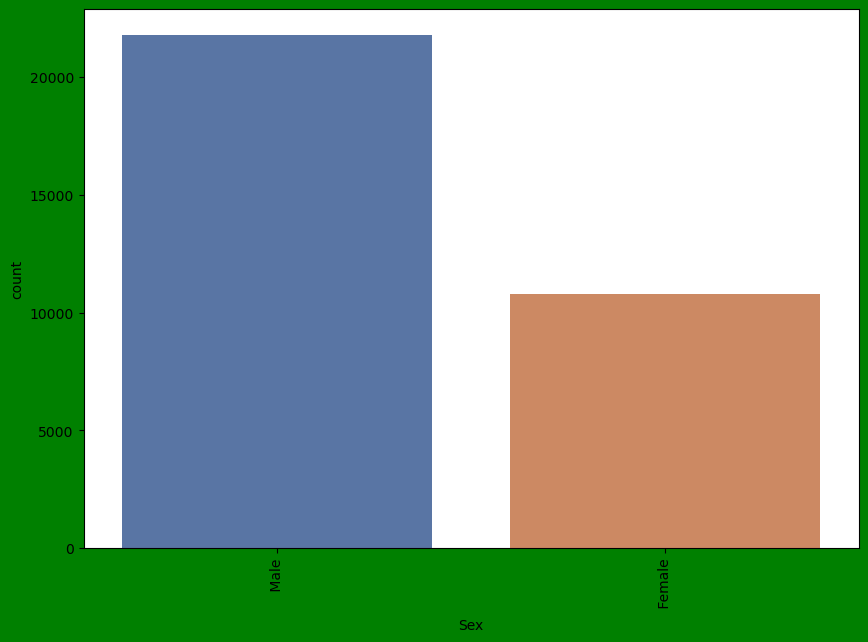

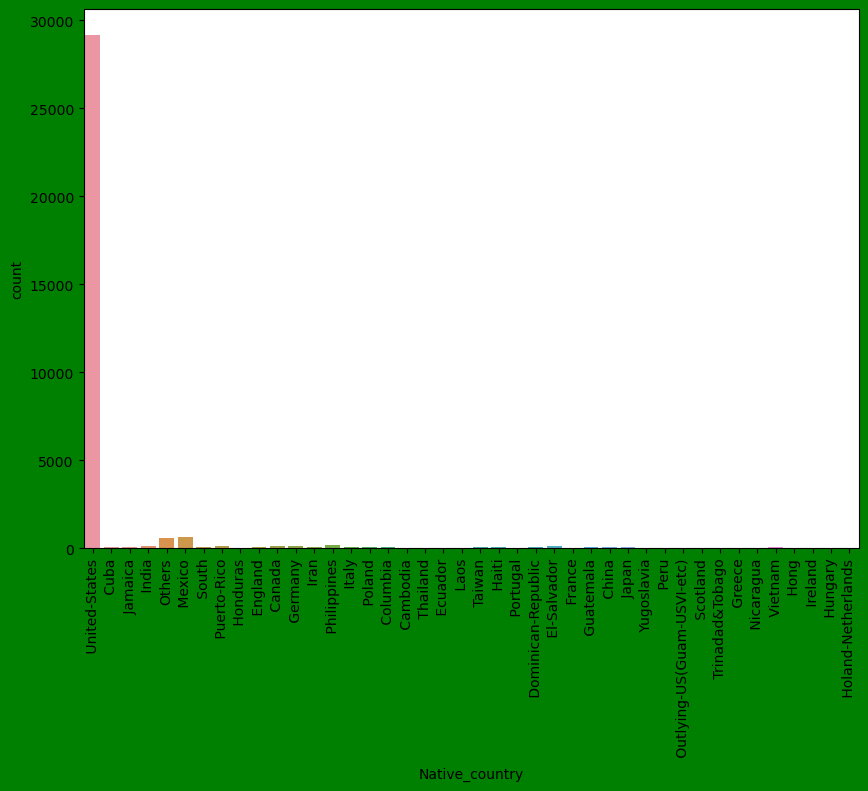

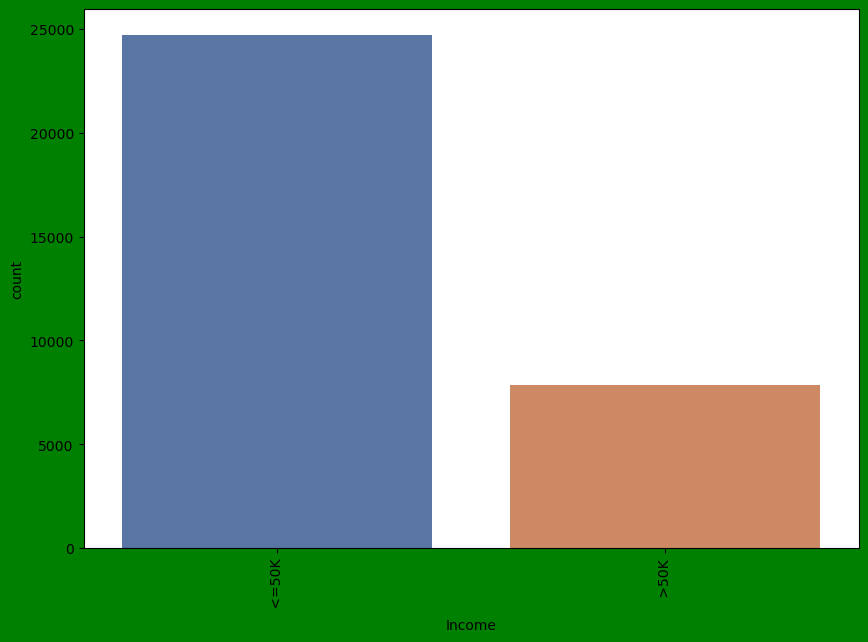

In [15]:
df1[["Occupation","Workclass","Native_country"]]=df1[["Occupation","Workclass","Native_country"]].replace(" ?","Others")
for i in df1[["Workclass", "Marital_status","Occupation", "Relationship", "Race", "Sex", "Native_country", "Income"]]:
    plt.figure(figsize=(10, 7), facecolor='green')
    sns.countplot(x=i, data=df1)
    plt.xticks(rotation=90)
    plt.show()


Observations:

    Some values present with " ? " in variables "Occupation", "Workclass" and "Native_country" have been replaced                by "Others".



To check for multicollinearity

***Correlation Analysis:

To compute and visualize pairwise correlations between numerical variables using heatmap.
To identify highly correlated variables (correlation coefficient > 0.7 or < -0.7).



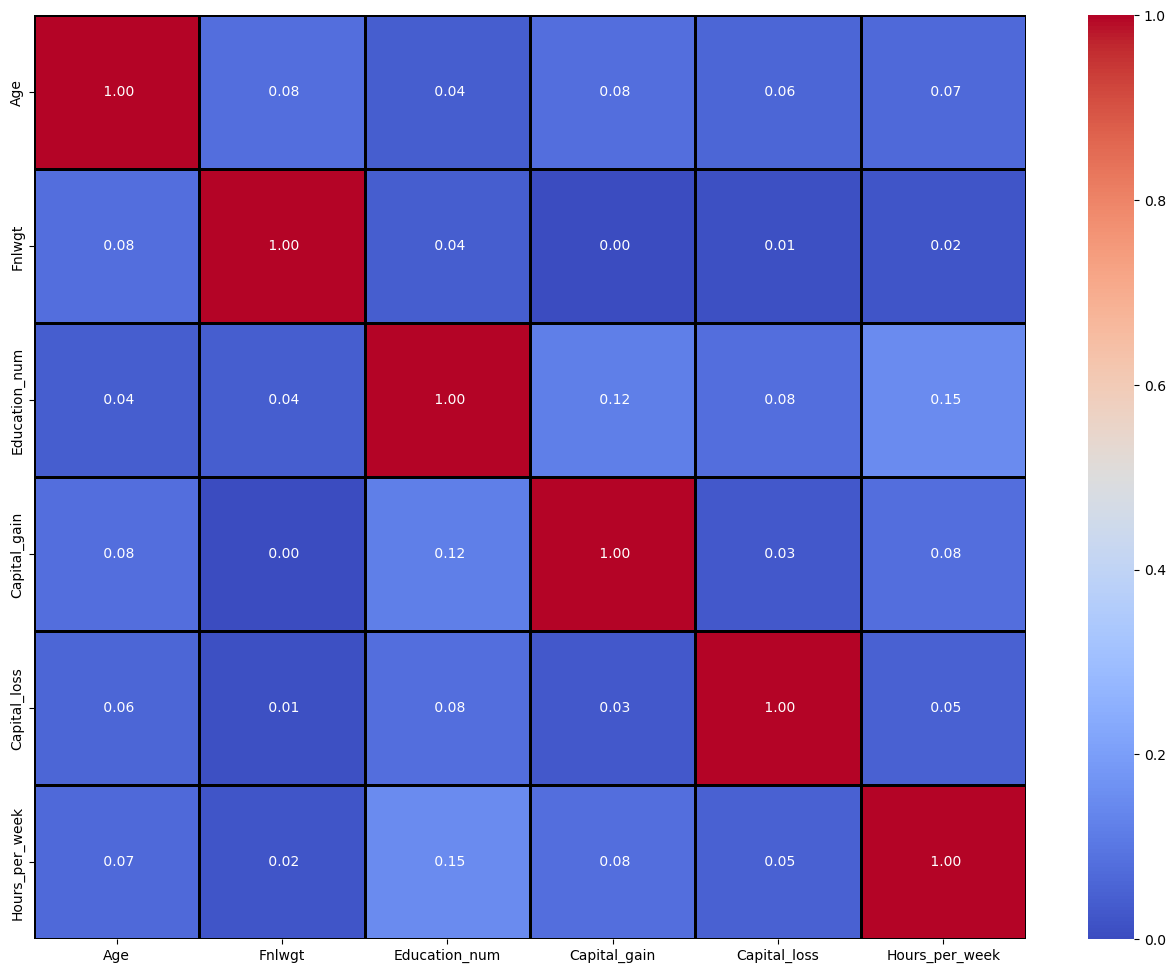

In [16]:
# Heatmap for correlation coefficient

plt.figure(figsize=(16,12))
sns.heatmap(round(abs(df1[Numerical].corr()),2),linewidths=1,linecolor='black',fmt=' .2f',cmap='coolwarm',annot=True)
plt.show()


Observation:

    There are no variables for which absolute value of correlation coefficient is more than 0.7. So we can say that    there are no variables with significant correlation.


To check for outliers in variables Fnlwgt, Capital_gain and Capital_loss, which have considerable skewness.

***Feature engineering

Boxcox transformation to reduce skewness



In [17]:
from scipy.stats import boxcox
X=pd.DataFrame()
for i in Numerical:
    if abs(df1[i].skew())>0.7:
        transformed_data, lambda_value = boxcox(df1[i]+1) 
        X[i]=transformed_data
        sk1=pd.Series(X[i]).skew()
        print(f'{i} = {sk1:.2f}')

Fnlwgt = 0.02
Capital_gain = 3.02
Capital_loss = 4.30



Observation:

Skewness Fnlwgt and Capital_gain has reduced considerably after the transformation.



To replace the variables by their transformed values.



In [18]:
df2=df1.drop(columns=X.columns,inplace=False)

In [19]:
df3=pd.concat([df2,X],axis=1)

In [20]:
df3.head(10)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Fnlwgt,Capital_gain,Capital_loss
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,274.417665,0.000000,0.0
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,410.194889,0.000000,0.0
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,425.134766,0.000000,0.0
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,496.082736,0.000000,0.0
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,461.129813,0.000000,0.0
5,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K,361.801023,0.000000,0.0
6,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,405.334649,0.000000,0.0
7,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,212.918741,0.734523,0.0
8,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,361.095945,0.734518,0.0
9,37,Private,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,458.303105,0.000000,0.0



To perform categorical to numerical transformation: Workclass, Marital_status, Occupation, Relationship, Race, Sex, Native_country, Income

Using one hot encoding as none of the categorical variables: 'Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country' can be considered ordinal in nature, except 'Income'.



In [21]:
df4=pd.get_dummies(df3[['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']],drop_first=True)


In [22]:
df4.head(10)

,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Workclass_Others,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Native_country_Others
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [23]:
df5=df3.drop(columns=['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country'],inplace=False)

In [24]:
df6=pd.concat([df5,df4],axis=1)
df6.head(10)
        

,Age,Education_num,Hours_per_week,Income,Fnlwgt,Capital_gain,Capital_loss,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Native_country_Others
0,50,13,13,<=50K,274.417665,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,40,<=50K,410.194889,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,7,40,<=50K,425.134766,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,13,40,<=50K,496.082736,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,14,40,<=50K,461.129813,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,49,5,16,<=50K,361.801023,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,52,9,45,>50K,405.334649,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,31,14,50,>50K,212.918741,0.734523,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,42,13,40,>50K,361.095945,0.734518,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9,37,10,80,>50K,458.303105,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0



Observation:

Categorical variables have been replaced by the numerical values except Income.



***Mapping variable "Income", which is the target variable.



<Figure size 800x800 with 0 Axes>

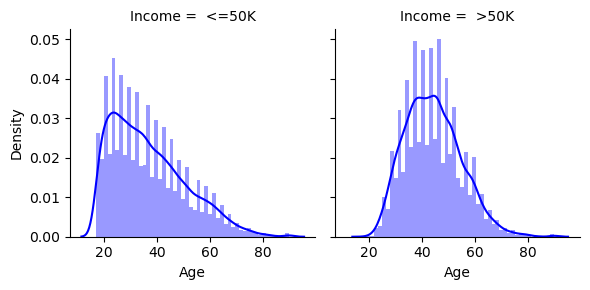

In [25]:
plt.figure(figsize=(8,8))
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age',color='b')
plt.show()

In [26]:
df6["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [27]:
df6["Income"].dtype

dtype('O')

In [28]:
# Clean values in the "Income" column by removing leading and trailing whitespaces

df6["Income"] = df6["Income"].str.strip()

In [29]:
# Map cleaned values to 0 and 1

df6["Income"] = df6["Income"].map({"<=50K": 0, ">50K": 1})

In [30]:
df6.head(10)

,Age,Education_num,Hours_per_week,Income,Fnlwgt,Capital_gain,Capital_loss,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Native_country_Others
0,50,13,13,0,274.417665,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,9,40,0,410.194889,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,7,40,0,425.134766,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,13,40,0,496.082736,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,14,40,0,461.129813,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,49,5,16,0,361.801023,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,52,9,45,1,405.334649,0.000000,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,31,14,50,1,212.918741,0.734523,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,42,13,40,1,361.095945,0.734518,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
9,37,10,80,1,458.303105,0.000000,0.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df6["Income"].value_counts()

0    24719
1     7841
Name: Income, dtype: int64


Observation:

Both the classes have been properly mapped.



Checking the variable type after all the transformations.



In [32]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 86 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Age                                         32560 non-null  int64  
 1   Education_num                               32560 non-null  int64  
 2   Hours_per_week                              32560 non-null  int64  
 3   Income                                      32560 non-null  int64  
 4   Fnlwgt                                      32560 non-null  float64
 5   Capital_gain                                32560 non-null  float64
 6   Capital_loss                                32560 non-null  float64
 7   Workclass_ Local-gov                        32560 non-null  uint8  
 8   Workclass_ Never-worked                     32560 non-null  uint8  
 9   Workclass_ Private                          32560 non-null  uint8  
 10  Workclass_


Observation:

All the variables have now been transformed to numerical type.


***Segregating the target variable "Income" from the rest of the variables.



In [33]:
# Features
X1=df6.drop(columns="Income",inplace=False)
# Target variable
y=df6["Income"]

In [34]:
X1.describe()

,Age,Education_num,Hours_per_week,Fnlwgt,Capital_gain,Capital_loss,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Native_country_Others
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,...,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,40.437469,373.825806,0.061157,0.016343,0.064281,0.000215,0.697052,0.034275,...,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895854,0.002058,0.000491,0.017905
std,13.640642,2.572709,12.347618,91.210819,0.202932,0.073880,0.245257,0.014661,0.459540,0.181938,...,0.059068,0.019194,0.049508,0.039547,0.023506,0.024150,0.305455,0.045316,0.022162,0.132610
min,17.000000,1.000000,1.000000,121.581329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,317.765614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,378.603799,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.000000,12.000000,45.000000,426.913325,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,90.000000,16.000000,99.000000,924.759325,0.734524,0.350316,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Observation:

There is a significant variation in the range of variables "Fnlwgt" and "Capital_loss"

Similarly there are othervariables which vary from rest others.


***Scaling the dataframe using min max scaler



In [35]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X2=scale.fit_transform(X1)
X3=pd.DataFrame(X2,columns=X1.columns)

In [36]:
X3.describe()

,Age,Education_num,Hours_per_week,Fnlwgt,Capital_gain,Capital_loss,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Native_country_Others
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,...,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,0.295639,0.605373,0.402423,0.314058,0.083260,0.046652,0.064281,0.000215,0.697052,0.034275,...,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895854,0.002058,0.000491,0.017905
std,0.186858,0.171514,0.125996,0.113562,0.276277,0.210896,0.245257,0.014661,0.459540,0.181938,...,0.059068,0.019194,0.049508,0.039547,0.023506,0.024150,0.305455,0.045316,0.022162,0.132610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.397959,0.244260,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.273973,0.600000,0.397959,0.320007,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.424658,0.733333,0.448980,0.380155,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Observation:

All the variables have been properly scaled between 0 and 1.


***To remove class imbalance of variable "Income".



In [37]:
#from imblearn.over_sampling import SMOTE
#sm=SMOTE()
#X1,y=sm.fit_resample(X1,y)
#y.value_counts()

# Model Building

In [38]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV

# To find the Random state:

In [ ]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X1,y, test_size=0.3,random_state=i)
    RF=RandomForestClassifier()
    model_RF=RF.fit(X_train,y_train)
    y_pred=model_RF.predict(X_test)
    Acc=accuracy_score(y_test,y_pred)
    if Acc>maxAcc:
        maxAcc=Acc
        random=i
print(f'Max accuracy: {round(maxAcc,2)}')
print(f'Best_random_state: {random}')